In [16]:
import pandas as pd
import psycopg2
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Connect to my database
# Database connection parameters
conn = psycopg2.connect(
    host="",
    port="",  
    database="",  
    user="",  
    password=""  
)

cursor = conn.cursor()

In [17]:
# Query for USC offensive stats along with weather, altitude, and distance
query = """
SELECT date, raw_location, opponent, result,
       passing_cmp, passing_att, completion_pct, passing_yds, passing_td, 
       rushing_att, rushing_yds, rushing_avg, rushing_td, total_plays, total_yards, avg_yds,
       pass_first_downs, rush_first_downs, first_down_pens, total_first_downs, 
       total_penalties, total_penalties_yds, total_fum, total_int, total_to,
       temp_f, precipitation_in, windspeed_mph, altitude_m, distance_from
FROM USC_Offensive_Stats;
"""

usc_data = pd.read_sql(query, conn)

usc_data.head()

,date,raw_location,opponent,result,passing_cmp,passing_att,completion_pct,passing_yds,passing_td,rushing_att,...,total_penalties,total_penalties_yds,total_fum,total_int,total_to,temp_f,precipitation_in,windspeed_mph,altitude_m,distance_from
0,2022-11-26,H,Notre Dame,W (38-27),18,22,81.8,232,1,39,...,6,55,0,0,0,58.6,0.0,3.4,51.0,0.0
1,2022-12-02,N,Utah,L (24-47),28,41,68.3,363,3,27,...,4,39,1,1,2,56.5,0.0,25.9,609.9,228.0
2,2023-01-02,N,Tulane*,L (45-46),37,52,71.2,462,5,32,...,5,37,0,1,1,70.0,0.0,0.0,184.0,1223.0
3,2021-09-04,H,San Jose State,W (30-7),24,36,66.7,256,2,34,...,4,35,1,0,1,73.0,0.0,8.6,51.0,0.0
4,2021-09-11,H,Stanford,L (28-42),27,42,64.3,223,1,33,...,9,111,0,1,1,74.9,0.0,7.6,51.0,0.0


In [19]:


# distance ranges 
bins = [0, 500, 1000, 1500, 4000]
labels = ['<500', '500-1000', '1000-1500', '1500+']

# new column for distance categories
usc_data['Distance_Range'] = pd.cut(usc_data['distance_from'], bins=bins, labels=labels, right=False)

distance_grouped = usc_data.groupby('Distance_Range').agg({
    'passing_yds': 'mean',
    'rushing_yds': 'mean',
    'total_yards': 'mean',
    'completion_pct': 'mean',
    'passing_td': 'mean',
    'rushing_att': 'mean',
    'passing_att': 'mean',  
    'rushing_td': 'mean',
    'total_first_downs': 'mean',
    'total_to': 'mean'
}).reset_index()

distance_grouped.head()


,Distance_Range,passing_yds,rushing_yds,total_yards,completion_pct,passing_td,rushing_att,passing_att,rushing_td,total_first_downs,total_to
0,<500,299.637255,163.823529,463.460784,67.048039,2.401961,35.421569,35.843137,1.911765,23.803922,1.274510
1,500-1000,274.000000,154.666667,428.666667,64.133333,2.333333,33.666667,33.333333,1.380952,21.285714,1.476190
2,1000-1500,304.666667,63.666667,368.333333,60.766667,1.666667,26.000000,45.666667,1.000000,18.666667,1.000000
3,1500+,277.666667,114.777778,392.444444,64.788889,1.444444,34.111111,37.888889,0.888889,21.333333,2.111111


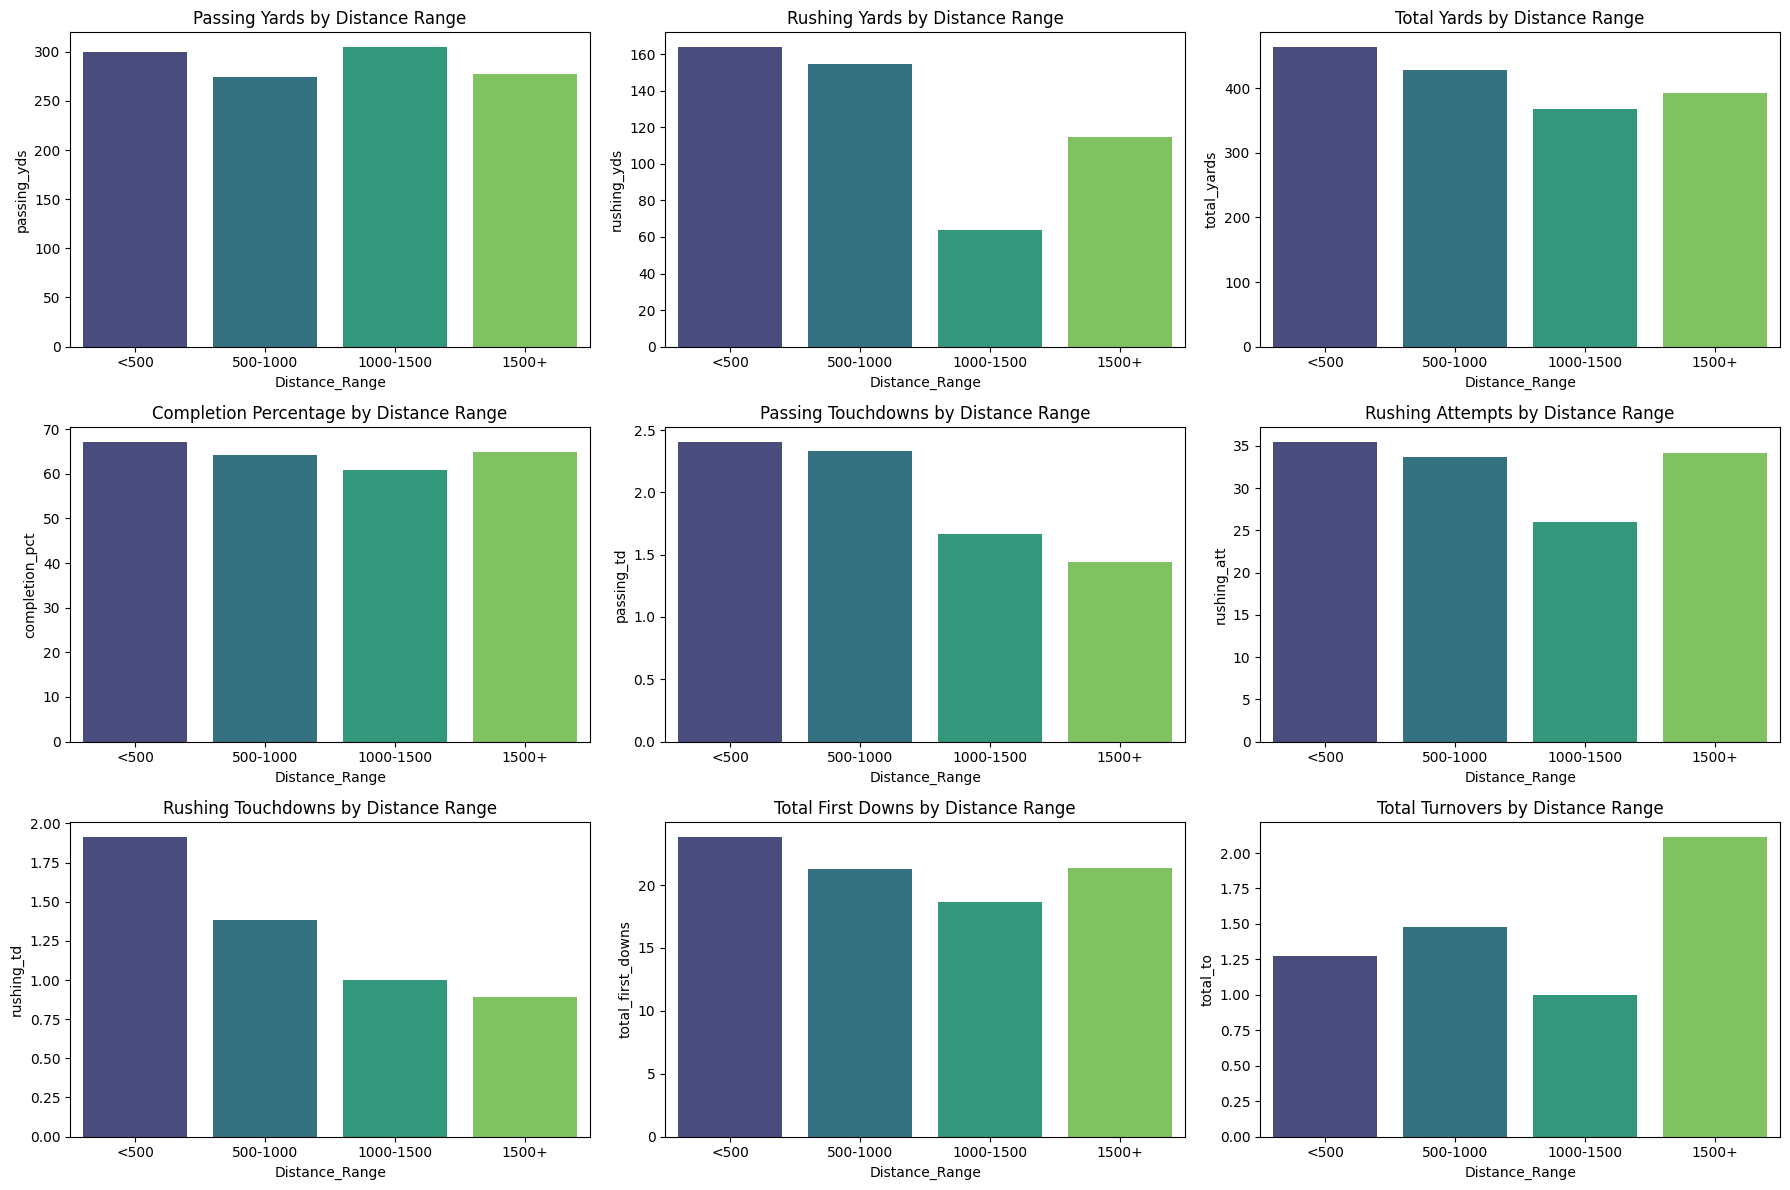

In [20]:
fig, axs = plt.subplots(3, 3, figsize=(18, 12))

# Passing Yards
sns.barplot(x='Distance_Range', y='passing_yds', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[0, 0], legend=False)
axs[0, 0].set_title('Passing Yards by Distance Range')

# Rushing Yards
sns.barplot(x='Distance_Range', y='rushing_yds', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[0, 1], legend=False)
axs[0, 1].set_title('Rushing Yards by Distance Range')

# Total Yards
sns.barplot(x='Distance_Range', y='total_yards', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[0, 2], legend=False)
axs[0, 2].set_title('Total Yards by Distance Range')

# Completion Percentage
sns.barplot(x='Distance_Range', y='completion_pct', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[1, 0], legend=False)
axs[1, 0].set_title('Completion Percentage by Distance Range')

# Passing Touchdowns
sns.barplot(x='Distance_Range', y='passing_td', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[1, 1], legend=False)
axs[1, 1].set_title('Passing Touchdowns by Distance Range')

# Rushing Attempts
sns.barplot(x='Distance_Range', y='rushing_att', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[1, 2], legend=False)
axs[1, 2].set_title('Rushing Attempts by Distance Range')

# Rushing Touchdowns
sns.barplot(x='Distance_Range', y='rushing_td', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[2, 0], legend=False)
axs[2, 0].set_title('Rushing Touchdowns by Distance Range')

# Total First Downs
sns.barplot(x='Distance_Range', y='total_first_downs', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[2, 1], legend=False)
axs[2, 1].set_title('Total First Downs by Distance Range')

# Total Turnovers
sns.barplot(x='Distance_Range', y='total_to', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[2, 2], legend=False)
axs[2, 2].set_title('Total Turnovers by Distance Range')

plt.tight_layout()
plt.show()



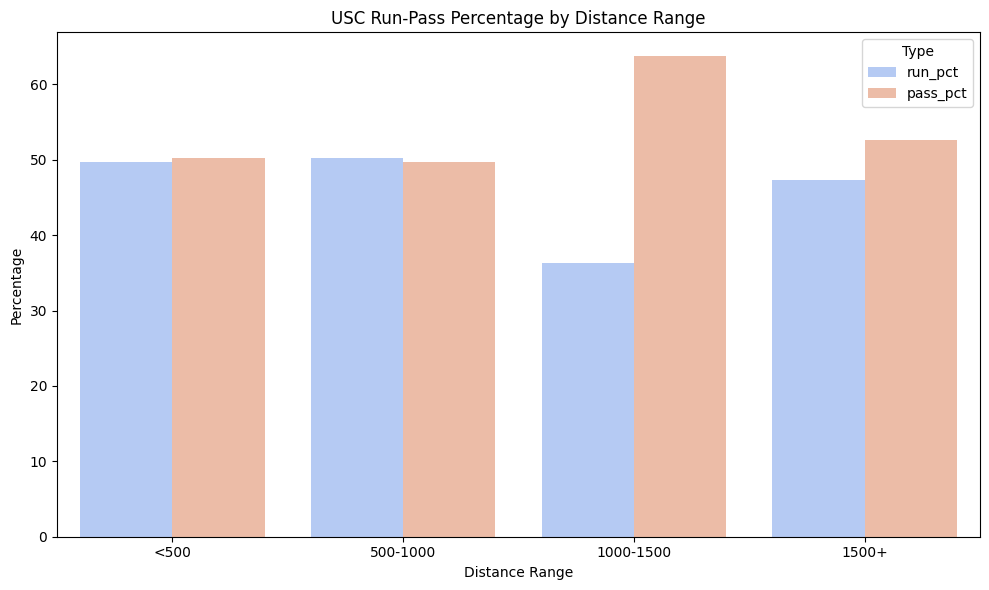

In [21]:
# Run-Pass %
distance_grouped['run_pct'] = distance_grouped['rushing_att'] / (distance_grouped['rushing_att'] + distance_grouped['passing_att']) * 100
distance_grouped['pass_pct'] = distance_grouped['passing_att'] / (distance_grouped['rushing_att'] + distance_grouped['passing_att']) * 100


fig, ax = plt.subplots(figsize=(10, 6))

# Plot Run and Pass Percentages side by side
distance_grouped_melted = pd.melt(distance_grouped, id_vars=['Distance_Range'], value_vars=['run_pct', 'pass_pct'], var_name='Type', value_name='Percentage')

sns.barplot(x='Distance_Range', y='Percentage', hue='Type', data=distance_grouped_melted, palette='coolwarm')

# titles and labels
ax.set_title('USC Run-Pass Percentage by Distance Range')
ax.set_ylabel('Percentage')
ax.set_xlabel('Distance Range')

# Display
plt.tight_layout()
plt.show()

In [10]:

conn = psycopg2.connect(
    host="",
    port="",
    database="",
    user="",
    password=""
)

# Queries for each team
ucla_query = """
SELECT date, raw_location, opponent, distance_from 
FROM UCLA_Offensive_Stats
WHERE raw_location = '@';
"""

usc_query = """
SELECT date, raw_location, opponent, distance_from 
FROM USC_Offensive_Stats
WHERE raw_location = '@';
"""

washington_query = """
SELECT date, raw_location, opponent, distance_from 
FROM Washington_Offensive_Stats
WHERE raw_location = '@';
"""

oregon_query = """
SELECT date, raw_location, opponent, distance_from 
FROM Oregon_Offensive_Stats
WHERE raw_location = '@';
"""

# Load the data into dfs
ucla_data = pd.read_sql(ucla_query, conn)
usc_data = pd.read_sql(usc_query, conn)
washington_data = pd.read_sql(washington_query, conn)
oregon_data = pd.read_sql(oregon_query, conn)

# Combine the data 
combined_data = pd.concat([ucla_data, usc_data, washington_data, oregon_data], ignore_index=True)

# Calculate the average distance traveled for each team
ucla_avg_distance = ucla_data['distance_from'].mean()
usc_avg_distance = usc_data['distance_from'].mean()
washington_avg_distance = washington_data['distance_from'].mean()
oregon_avg_distance = oregon_data['distance_from'].mean()

# Display
print(f"Average Distance Traveled by UCLA for Away Games: {ucla_avg_distance:.2f} miles")
print(f"Average Distance Traveled by USC for Away Games: {usc_avg_distance:.2f} miles")
print(f"Average Distance Traveled by Washington for Away Games: {washington_avg_distance:.2f} miles")
print(f"Average Distance Traveled by Oregon for Away Games: {oregon_avg_distance:.2f} miles")

# Calculate the combined average distance for all teams
combined_avg_distance = combined_data['distance_from'].mean()

print(f"Combined Average Distance Traveled by All Teams for Away Games: {combined_avg_distance:.2f} miles")


Average Distance Traveled by UCLA for Away Games: 605.82 miles
Average Distance Traveled by USC for Away Games: 757.39 miles
Average Distance Traveled by Washington for Away Games: 847.74 miles
Average Distance Traveled by Oregon for Away Games: 650.53 miles
Combined Average Distance Traveled by All Teams for Away Games: 712.43 miles


In [10]:

conn = psycopg2.connect(
    host="",
    port="",
    database="",
    user="",
    password=""
)

# Queries for each team (same as before)
ucla_query = """
SELECT date, raw_location, distance_from
FROM UCLA_Offensive_Stats;
"""
usc_query = """
SELECT date, raw_location, distance_from
FROM USC_Offensive_Stats;
"""
washington_query = """
SELECT date, raw_location, distance_from
FROM Washington_Offensive_Stats;
"""
oregon_query = """
SELECT date, raw_location, distance_from
FROM Oregon_Offensive_Stats;
"""

# Load data for each team
ucla_data = pd.read_sql(ucla_query, conn)
usc_data = pd.read_sql(usc_query, conn)
washington_data = pd.read_sql(washington_query, conn)
oregon_data = pd.read_sql(oregon_query, conn)

# Function to calculate total miles and games for away games
def calculate_away_stats(data, team_name):
    # Filter for away games (denoted by '@')
    away_games = data[data['raw_location'].str.startswith('@')]
    
    # Total miles traveled and total games played
    total_miles = away_games['distance_from'].sum()
    total_games = len(away_games)
    
    print(f"{team_name} - Total Miles: {total_miles}, Total Away Games: {total_games}")

# totals for each team
calculate_away_stats(ucla_data, "UCLA")
calculate_away_stats(usc_data, "USC")
calculate_away_stats(washington_data, "Washington")
calculate_away_stats(oregon_data, "Oregon")


combined_data = pd.concat([ucla_data, usc_data, washington_data, oregon_data])

# Calculate totals for all teams combined
calculate_away_stats(combined_data, "All Teams Combined")


UCLA - Total Miles: 35137.729999999996, Total Away Games: 58
USC - Total Miles: 43171.43999999999, Total Away Games: 58
Washington - Total Miles: 43234.72000000001, Total Away Games: 51
Oregon - Total Miles: 34478.1, Total Away Games: 54
All Teams Combined - Total Miles: 156021.99, Total Away Games: 221


In [11]:

conn = psycopg2.connect(
    host="",
    port="",
    database="",
    user="",
    password=""
)

# Queries for each team (selecting only away games)
ucla_query = """
SELECT date, raw_location, opponent, distance_from 
FROM UCLA_Offensive_Stats
WHERE raw_location = '@';
"""

usc_query = """
SELECT date, raw_location, opponent, distance_from 
FROM USC_Offensive_Stats
WHERE raw_location = '@';
"""

washington_query = """
SELECT date, raw_location, opponent, distance_from 
FROM Washington_Offensive_Stats
WHERE raw_location = '@';
"""

oregon_query = """
SELECT date, raw_location, opponent, distance_from 
FROM Oregon_Offensive_Stats
WHERE raw_location = '@';
"""

# Load the data into dfs
ucla_data = pd.read_sql(ucla_query, conn)
usc_data = pd.read_sql(usc_query, conn)
washington_data = pd.read_sql(washington_query, conn)
oregon_data = pd.read_sql(oregon_query, conn)

# Calculate total miles and total away games for each team
ucla_total_miles = ucla_data['distance_from'].sum()
ucla_total_games = len(ucla_data)

usc_total_miles = usc_data['distance_from'].sum()
usc_total_games = len(usc_data)

washington_total_miles = washington_data['distance_from'].sum()
washington_total_games = len(washington_data)

oregon_total_miles = oregon_data['distance_from'].sum()
oregon_total_games = len(oregon_data)

# Display
print(f"UCLA - Total Miles Traveled for Away Games: {ucla_total_miles:.2f} miles, Total Away Games: {ucla_total_games}")
print(f"USC - Total Miles Traveled for Away Games: {usc_total_miles:.2f} miles, Total Away Games: {usc_total_games}")
print(f"Washington - Total Miles Traveled for Away Games: {washington_total_miles:.2f} miles, Total Away Games: {washington_total_games}")
print(f"Oregon - Total Miles Traveled for Away Games: {oregon_total_miles:.2f} miles, Total Away Games: {oregon_total_games}")

# Combine the data for all teams
combined_data = pd.concat([ucla_data, usc_data, washington_data, oregon_data], ignore_index=True)

# Calculate combined total miles and total away games
combined_total_miles = combined_data['distance_from'].sum()
combined_total_games = len(combined_data)

print(f"\nCombined Total Miles Traveled for Away Games: {combined_total_miles:.2f} miles")
print(f"Combined Total Away Games: {combined_total_games}")


UCLA - Total Miles Traveled for Away Games: 35137.73 miles, Total Away Games: 58
USC - Total Miles Traveled for Away Games: 43171.44 miles, Total Away Games: 58
Washington - Total Miles Traveled for Away Games: 43234.72 miles, Total Away Games: 51
Oregon - Total Miles Traveled for Away Games: 34478.10 miles, Total Away Games: 54

Combined Total Miles Traveled for Away Games: 156021.99 miles
Combined Total Away Games: 221


In [14]:

distance_bins = [0, 500, 1000, 1500, float('inf')]
distance_labels = ['<500 miles', '500-1000 miles', '1000-1500 miles', '1500+ miles']


usc_data['Distance_Range'] = pd.cut(usc_data['distance_from'], bins=distance_bins, labels=distance_labels)


usc_data['win'] = usc_data['result'].apply(lambda x: 1 if x.strip()[0] == 'W' else 0)


distance_grouped = usc_data.groupby('Distance_Range').agg(
    total_games=('win', 'count'),
    total_wins=('win', 'sum')
)


distance_grouped['win_percentage'] = (distance_grouped['total_wins'] / distance_grouped['total_games']) * 100


print(distance_grouped)


                 total_games  total_wins  win_percentage
Distance_Range                                          
<500 miles                33          22       66.666667
500-1000 miles            21          12       57.142857
1000-1500 miles            3           0        0.000000
1500+ miles                9           1       11.111111


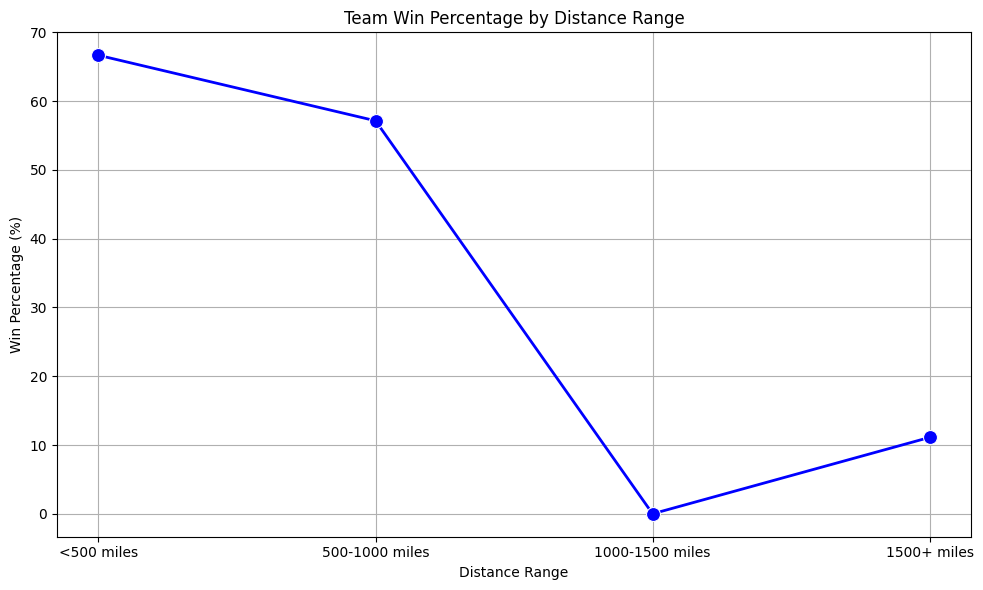

In [15]:

distance_grouped.reset_index(inplace=True)  


plt.figure(figsize=(10, 6))
sns.lineplot(x='Distance_Range', y='win_percentage', data=distance_grouped, marker='o', linewidth=2, markersize=10, color='b')


plt.xlabel('Distance Range')
plt.ylabel('Win Percentage (%)')
plt.title('Team Win Percentage by Distance Range')


plt.grid(True)
plt.tight_layout()
plt.show()


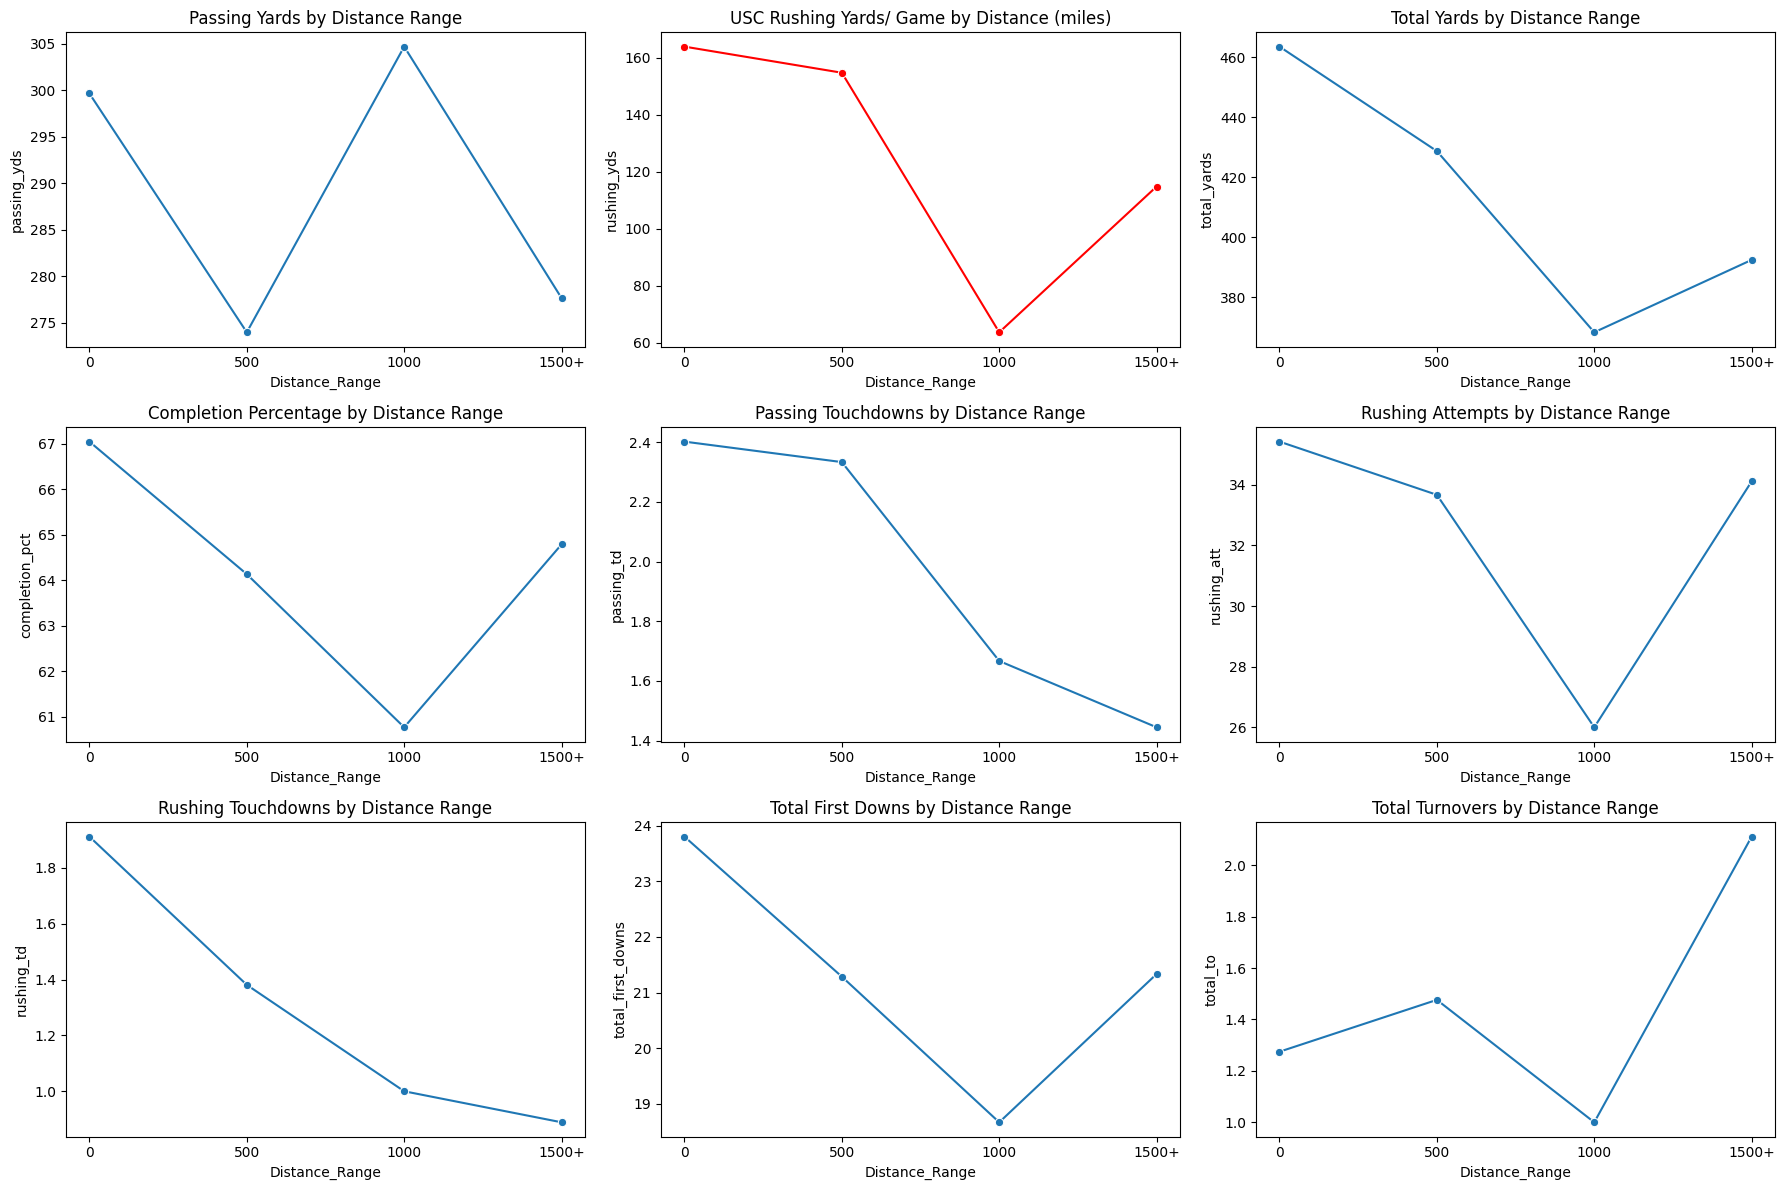

In [23]:

fig, axs = plt.subplots(3, 3, figsize=(18, 12))

# Define new labels for the Distance Range
distance_labels = ['0', '500', '1000', '1500+']

# Passing Yards
sns.lineplot(x='Distance_Range', y='passing_yds', data=distance_grouped, marker='o', ax=axs[0, 0])
axs[0, 0].set_title('Passing Yards by Distance Range')
axs[0, 0].set_xticklabels(distance_labels)

# Rushing Yards
sns.lineplot(x='Distance_Range', y='rushing_yds', data=distance_grouped, marker='o', ax=axs[0, 1], color = 'red')
axs[0, 1].set_title('USC Rushing Yards/ Game by Distance (miles)')
axs[0, 1].set_xticklabels(distance_labels)

# Total Yards
sns.lineplot(x='Distance_Range', y='total_yards', data=distance_grouped, marker='o', ax=axs[0, 2])
axs[0, 2].set_title('Total Yards by Distance Range')
axs[0, 2].set_xticklabels(distance_labels)

# Completion Percentage
sns.lineplot(x='Distance_Range', y='completion_pct', data=distance_grouped, marker='o', ax=axs[1, 0])
axs[1, 0].set_title('Completion Percentage by Distance Range')
axs[1, 0].set_xticklabels(distance_labels)

# Passing Touchdowns
sns.lineplot(x='Distance_Range', y='passing_td', data=distance_grouped, marker='o', ax=axs[1, 1])
axs[1, 1].set_title('Passing Touchdowns by Distance Range')
axs[1, 1].set_xticklabels(distance_labels)

# Rushing Attempts
sns.lineplot(x='Distance_Range', y='rushing_att', data=distance_grouped, marker='o', ax=axs[1, 2])
axs[1, 2].set_title('Rushing Attempts by Distance Range')
axs[1, 2].set_xticklabels(distance_labels)

# Rushing Touchdowns
sns.lineplot(x='Distance_Range', y='rushing_td', data=distance_grouped, marker='o', ax=axs[2, 0])
axs[2, 0].set_title('Rushing Touchdowns by Distance Range')
axs[2, 0].set_xticklabels(distance_labels)

# Total First Downs
sns.lineplot(x='Distance_Range', y='total_first_downs', data=distance_grouped, marker='o', ax=axs[2, 1])
axs[2, 1].set_title('Total First Downs by Distance Range')
axs[2, 1].set_xticklabels(distance_labels)

# Total Turnovers
sns.lineplot(x='Distance_Range', y='total_to', data=distance_grouped, marker='o', ax=axs[2, 2])
axs[2, 2].set_title('Total Turnovers by Distance Range')
axs[2, 2].set_xticklabels(distance_labels)


plt.tight_layout()
plt.show()
